# Pandas Time Series Analysis Part 7: Shifting and Lagging

## Inspired by Dhruv Patel's Code Basics YouTube Channel

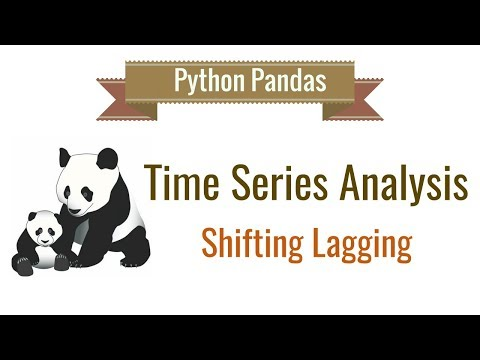

In [1]:
from IPython.display import YouTubeVideo

# Youtube
YouTubeVideo('0lsmdNLNorY')

In [3]:
import pandas as pd 

In [10]:
fb_stock_df = pd.read_csv('FB_Stock_Prices.csv', parse_dates=['Date'],index_col='Date') 

In [11]:
fb_stock_df 

,Price
Date,
2017-08-15,171.00
2017-08-16,170.00
2017-08-17,166.91
2017-08-18,167.41
2017-08-21,167.78
2017-08-22,169.64
2017-08-23,168.71
2017-08-24,167.74
2017-08-25,166.32


#### Use the shift function to shift the stock price by one day

In [12]:
fb_stock_df.shift(1) # This function pushes down the price by one row

,Price
Date,
2017-08-15,NaN
2017-08-16,171.00
2017-08-17,170.00
2017-08-18,166.91
2017-08-21,167.41
2017-08-22,167.78
2017-08-23,169.64
2017-08-24,168.71
2017-08-25,167.74


In [13]:
fb_stock_df.shift(2) # This function pushes down the price by two row

,Price
Date,
2017-08-15,NaN
2017-08-16,NaN
2017-08-17,171.00
2017-08-18,170.00
2017-08-21,166.91
2017-08-22,167.41
2017-08-23,167.78
2017-08-24,169.64
2017-08-25,168.71


In [14]:
fb_stock_df.shift(-1) # This function pushes up the price by two row

,Price
Date,
2017-08-15,170.00
2017-08-16,166.91
2017-08-17,167.41
2017-08-18,167.78
2017-08-21,169.64
2017-08-22,168.71
2017-08-23,167.74
2017-08-24,166.32
2017-08-25,167.24


## Practical Usage of shift method

In [16]:
fb_stock_df['Prev Day Price'] = fb_stock_df['Price'].shift(1) 
fb_stock_df 

,Price,Prev Day Price
Date,,
2017-08-15,171.00,NaN
2017-08-16,170.00,171.00
2017-08-17,166.91,170.00
2017-08-18,167.41,166.91
2017-08-21,167.78,167.41
2017-08-22,169.64,167.78
2017-08-23,168.71,169.64
2017-08-24,167.74,168.71
2017-08-25,166.32,167.74


In [17]:
fb_stock_df['One day change'] = fb_stock_df['Price'] - fb_stock_df['Prev Day Price'] 
fb_stock_df 

,Price,Prev Day Price,One day change
Date,,,
2017-08-15,171.00,NaN,NaN
2017-08-16,170.00,171.00,-1.00
2017-08-17,166.91,170.00,-3.09
2017-08-18,167.41,166.91,0.50
2017-08-21,167.78,167.41,0.37
2017-08-22,169.64,167.78,1.86
2017-08-23,168.71,169.64,-0.93
2017-08-24,167.74,168.71,-0.97
2017-08-25,166.32,167.74,-1.42


### Calculate 5 day return

In [21]:
fb_stock_df['5 day % return'] = (fb_stock_df['Price'] - fb_stock_df['Price'].shift(5))*100/fb_stock_df['Price'].shift(5) 

In [22]:
fb_stock_df

,Price,Prev Day Price,One day change,5 day % return
Date,,,,
2017-08-15,171.00,NaN,NaN,NaN
2017-08-16,170.00,171.00,-1.00,NaN
2017-08-17,166.91,170.00,-3.09,NaN
2017-08-18,167.41,166.91,0.50,NaN
2017-08-21,167.78,167.41,0.37,NaN
2017-08-22,169.64,167.78,1.86,-0.795322
2017-08-23,168.71,169.64,-0.93,-0.758824
2017-08-24,167.74,168.71,-0.97,0.497274
2017-08-25,166.32,167.74,-1.42,-0.651096


### Instead of shifting the price if we want to shift the dates

In [23]:
fb_stock_df = fb_stock_df.loc[:,'Price'] # Simplifying the data frame by keeping only the Price column

In [24]:
fb_stock_df 

Date
2017-08-15    171.00
2017-08-16    170.00
2017-08-17    166.91
2017-08-18    167.41
2017-08-21    167.78
2017-08-22    169.64
2017-08-23    168.71
2017-08-24    167.74
2017-08-25    166.32
2017-08-28    167.24
Name: Price, dtype: float64

In [25]:
fb_stock_df.index # Note the frequency is none

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [28]:
fb_stock_df.index = pd.date_range(start = '2017-08-15', periods=10, freq='B')

In [29]:
fb_stock_df 

2017-08-15    171.00
2017-08-16    170.00
2017-08-17    166.91
2017-08-18    167.41
2017-08-21    167.78
2017-08-22    169.64
2017-08-23    168.71
2017-08-24    167.74
2017-08-25    166.32
2017-08-28    167.24
Freq: B, Name: Price, dtype: float64

In [30]:
fb_stock_df.index 

DatetimeIndex(['2017-08-15', '2017-08-16', '2017-08-17', '2017-08-18',
               '2017-08-21', '2017-08-22', '2017-08-23', '2017-08-24',
               '2017-08-25', '2017-08-28'],
              dtype='datetime64[ns]', freq='B')

In [31]:
fb_stock_df.tshift(1) # tshift will shift the index and not the values 

2017-08-16    171.00
2017-08-17    170.00
2017-08-18    166.91
2017-08-21    167.41
2017-08-22    167.78
2017-08-23    169.64
2017-08-24    168.71
2017-08-25    167.74
2017-08-28    166.32
2017-08-29    167.24
Freq: B, Name: Price, dtype: float64

In [32]:
fb_stock_df.tshift(-1) # tshift will shift the index in reverse order and not the values 

2017-08-14    171.00
2017-08-15    170.00
2017-08-16    166.91
2017-08-17    167.41
2017-08-18    167.78
2017-08-21    169.64
2017-08-22    168.71
2017-08-23    167.74
2017-08-24    166.32
2017-08-25    167.24
Freq: B, Name: Price, dtype: float64